<h1 align='center' style='color:purple'>Clustering With K Means</h1>

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# EDA

Text(0, 0.5, 'Income($)')

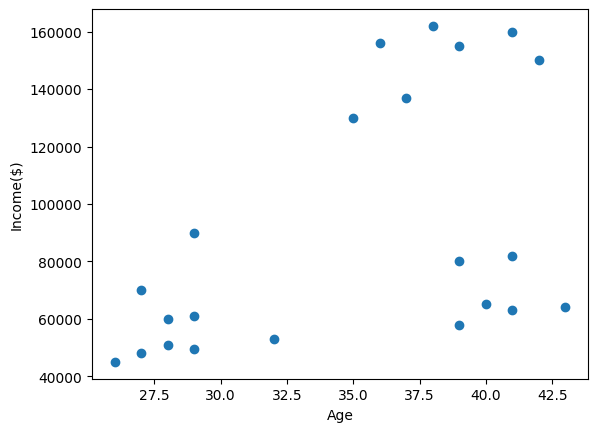

In [5]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

# KMeans

In [6]:
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

# Clustering Output Visualization

In [5]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [6]:
df['cluster']= km.labels_
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [18]:
df.groupby('cluster').describe().T

cluster                 0         1         2
Age       count  9.000000  6.000000  7.000000
          mean   0.137255  0.852941  0.722689
          std    0.101885  0.089210  0.150793
          min    0.000000  0.764706  0.529412
          25%    0.058824  0.779412  0.617647
          50%    0.117647  0.852941  0.705882
          75%    0.176471  0.882353  0.823529
          max    0.352941  1.000000  0.941176
Income($) count  9.000000  6.000000  7.000000
          mean   0.116334  0.202279  0.897436
          std    0.120604  0.084381  0.103156
          min    0.000000  0.111111  0.726496
          25%    0.038462  0.155983  0.841880
          50%    0.068376  0.166667  0.940171
          75%    0.136752  0.267094  0.965812
          max    0.384615  0.316239  1.000000

In [7]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

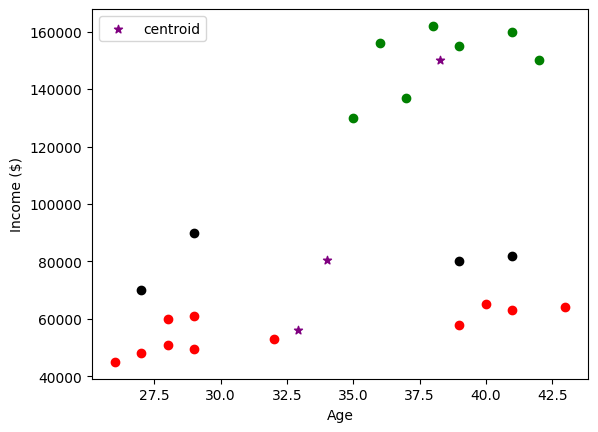

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# Preprocessing using min max scaler

In [9]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [10]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


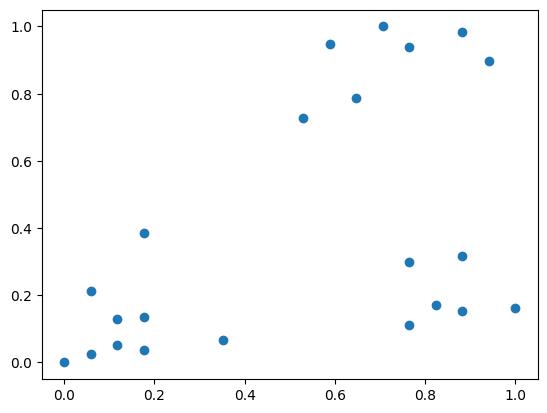

In [11]:
plt.scatter(df.Age,df['Income($)'])

In [12]:
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [14]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

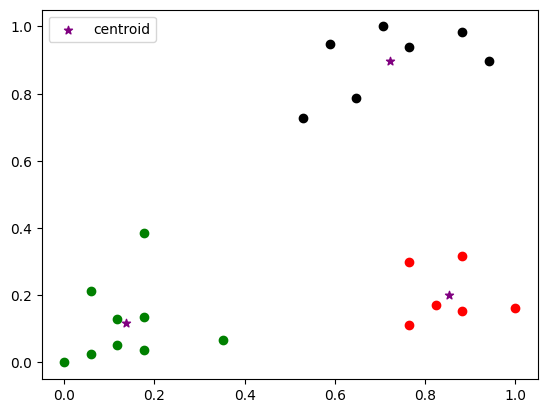

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Elbow Plot to identify best K

In [ ]:
wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(df[['Age','Income($)']])
    wcss.append(km.inertia_)

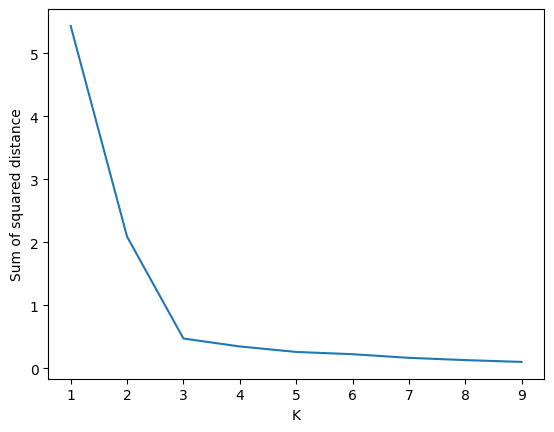

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.plot(k_rng,wcss)